In [2]:
import numpy as np
import matplotlib.pyplot as plt

euler_npz = '/data/score_sde_outputs/checkpoint_8/euler_1000/samples_0.npz'
data = np.load(euler_npz)
references = data['samples'].astype(np.float32)

In [3]:
import os
import numpy as np

base_dir = "../score_sde_outputs/checkpoint_8"
results = []       # (디렉토리 경로, diff) 튜플을 저장할 리스트

for root, dirs, files in os.walk(base_dir):
    if 'samples_0.npz' in files:
        file_path = os.path.join(root, 'samples_0.npz')
        data = np.load(file_path)
        samples = data['samples'].astype(np.float32)
        
        # references가 이미 정의되어 있다고 가정
        diff = np.mean(np.abs(references - samples))
        
        # diff 값을 저장 (디렉토리 경로, diff)
        results.append((os.path.basename(root), diff))
        

# 정렬된 결과 출력
results.sort(key=lambda x: x[0])
for root, diff_value in results:
    print(root, diff_value)


euler_10 11.878929
euler_1000 0.0
lagrange_10 4.4752464
lagrange_5 11.761868
lagrange_6 13.616203
lagrange_8 8.223865
lagrange_mix_10 3.8764675
lagrange_mix_12 3.369564
lagrange_mix_15 1.9351107
lagrange_mix_20 1.0224546
lagrange_mix_25 0.59590274
lagrange_mix_5 30.612417
lagrange_mix_6 19.855972
lagrange_mix_8 6.838885
rbf_100_10 4.6050544
rbf_100_5 11.718299
rbf_100_6 9.160007
rbf_100_8 5.6332145
rbf_const_grid_optimal_10 4.953646
rbf_const_grid_optimal_5 11.249458
rbf_const_grid_optimal_6 10.065587
rbf_const_grid_optimal_8 6.125365
rbf_const_optimal_10 5.035904
rbf_const_optimal_5 10.598403
rbf_const_optimal_6 10.453789
rbf_const_optimal_8 6.4110336
rbf_dual_10 4.496086
rbf_dual_12 7.596035
rbf_dual_5 11.718282
rbf_dual_6 9.157387
rbf_dual_8 5.862551
rbf_ecp_optimal_10 4.6050735
rbf_ecp_optimal_12 4.1007705
rbf_ecp_optimal_5 10.860032
rbf_ecp_optimal_6 8.466301
rbf_ecp_optimal_8 6.9645057
rbf_ecp_same_optimal_10 4.3172927
rbf_ecp_same_optimal_5 10.870486
rbf_ecp_same_optimal_6 8.737

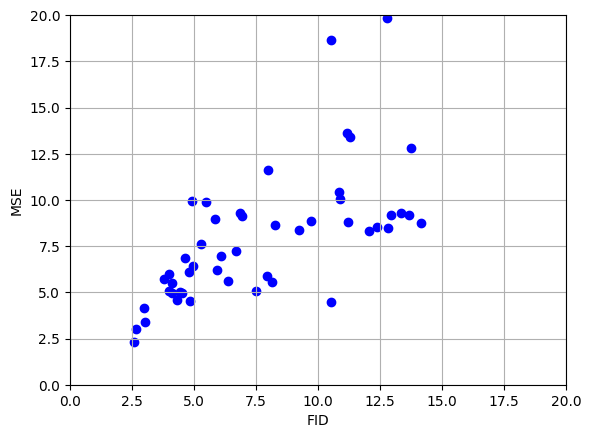

In [4]:
fid_mse_dict = {}
for root, diff_value in results:
    fid_file = f'../fid/{root}_output.txt'
    if os.path.exists(fid_file):
        with open(fid_file, 'r') as f:
            fid = float(f.readlines()[2][7:])
            fid_mse_dict[root] = (fid, diff_value)

import matplotlib.pyplot as plt

for key in fid_mse_dict.keys():
    fid, mse = fid_mse_dict[key]
    plt.scatter(fid, mse, color='blue')
plt.xlim([0, 20])
plt.ylim([0, 20])
plt.xlabel("FID")
plt.ylabel("MSE")
plt.grid()
plt.show()